# **Project(Sign Language )**
## **Lyana Murad**

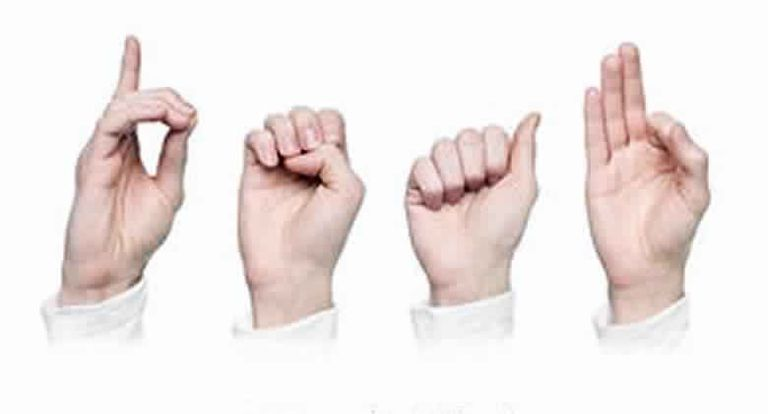

##### **Import Libraries**

In [153]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report


##### **Loading Sign Language MNIST Dataset**
##### This code snippet imports the pandas library and uses it to read two CSV files containing the Sign Language MNIST dataset: one for training (sign_mnist_train.csv) and one for testing (sign_mnist_test.csv). The dataset consists of grayscale images of hand signs representing the letters A to Z in American Sign Language (ASL), with each image being labeled accordingly. The training dataset is used to train a model, while the test dataset is used for evaluation.

In [154]:
train=pd.read_csv('C:/Users/NTC/Desktop/deep learning/CNN/sing/sign_mnist_train/sign_mnist_train.csv')
test=pd.read_csv('C:/Users/NTC/Desktop/deep learning/CNN/sing/sign_mnist_test/sign_mnist_test.csv')

In [155]:
train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195


In [156]:
test.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222


In [157]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


##### **Combining Training and Testing Datasets**
##### This code snippet combines the training (train) and testing (test) datasets from the Sign Language MNIST dataset into a single DataFrame (combined_df). The pd.concat() function is used to concatenate the two datasets along the rows (axis=0). After combining, the reset_index() method is called with drop=True to reset the index of the combined DataFrame, ensuring that it has a continuous range of indices without retaining the old indices.

In [158]:

combined_df = pd.concat([train, test], axis=0)
combined_df = combined_df.reset_index(drop=True)


In [159]:
print(combined_df.shape)


(34627, 785)


##### **Identifying Unique Labels in the Combined Dataset**
##### This code snippet retrieves the unique labels from the label column in the combined DataFrame (combined_df) that contains both training and testing data from the Sign Language MNIST dataset. The unique() method is used to extract distinct values, which represent the different hand signs (letters A to Z) in American Sign Language (ASL). This step is useful for understanding the variety of classes available in the dataset.

In [160]:
combined_df['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14], dtype=int64)

##### **Separating Features and Labels from the Combined Dataset**
##### This code snippet separates the features and labels from the combined DataFrame (combined_df) containing the Sign Language MNIST dataset. The drop() method is used to exclude the label column, creating a feature array X that contains all the pixel values of the images. The values attribute converts the DataFrame into a NumPy array. Simultaneously, the labels are extracted into a separate array y, which contains the corresponding class labels for each image, representing the hand signs in American Sign Language (ASL). This separation is crucial for preparing the data for training machine learning or deep learning models.

In [161]:
X = combined_df.drop(columns='label').values  
y = combined_df['label'].values

In [162]:
X

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]], dtype=int64)

In [163]:
print(y.shape)
print(X.shape)

(34627,)
(34627, 784)


In [164]:
X = X.reshape(-1, 28, 28, 1)
X = X / 255.0

##### **Visualizing Unique Images from the Sign Language MNIST Dataset**
##### This code snippet defines a function, plot_unique_images, which visualizes the unique hand signs from the Sign Language MNIST dataset. The function takes two arguments: X (the feature array containing image pixel values) and y (the label array containing corresponding class labels).

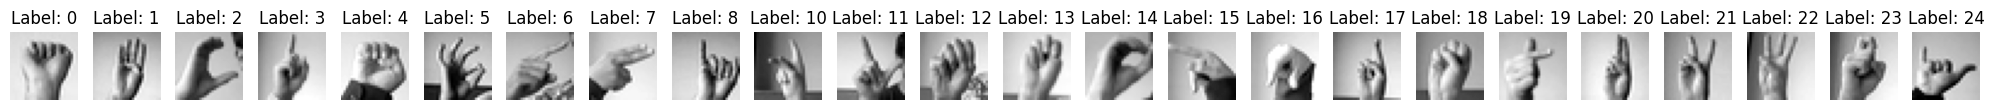

In [165]:

def plot_unique_images(X, y):
    unique_labels = np.unique(y)
    
    num_unique = len(unique_labels)

    plt.figure(figsize=(20, 10))
    
    for i, label in enumerate(unique_labels):
     
        index = np.where(y == label)[0][0]

 
        plt.subplot(1, num_unique, i + 1)
        plt.imshow(X[index].reshape(28, 28), cmap='gray')
        plt.axis('off')
        
     
        plt.title(f'Label: {label}')

    plt.tight_layout()
    plt.show()

# Call the function to visualize unique images
plot_unique_images(X, y)


##### **Splitting the Dataset into Training, Validation, and Testing Sets**
##### The provided code snippet demonstrates how to effectively split the Sign Language MNIST dataset into three distinct subsets: training, validation, and testing. This separation is crucial for building a robust machine learning model, as it allows for proper evaluation and tuning of the model's performance.

##### **Purpose of Splitting:**
##### Training Set: This subset is used to train the model. It contains the majority of the data, allowing the model to learn the underlying patterns and features of the dataset.
##### Validation Set: This subset is used to tune the model’s hyperparameters and make decisions about model architecture. It helps assess the model's performance on unseen data during training and is crucial for preventing overfitting.
##### Test Set: This subset is reserved for final evaluation after the model has been trained and validated. It provides an unbiased assessment of how well the model performs on completely new data.

##### **Using train_test_split:**
##### The train_test_split function from sklearn.model_selection is a powerful utility that simplifies the process of splitting datasets. It randomly divides the dataset into specified proportions for each subset.
##### The first call to train_test_split separates the data into a temporary set and the test set, while the second call splits the temporary set into training and validation sets. This ensures that the test set remains untouched until the final evaluation.

##### **Implementation Steps:**
##### The dataset is initially divided into training and testing sets, with 20% of the data allocated for testing. The remaining 80% is retained for training and validation.
##### The temporary set (80% of the data) is further split into training and validation sets, with 25% of the temporary set (which is 20% of the original dataset) allocated for validation.
##### This results in a final split of approximately 60% for training, 20% for validation, and 20% for testing.

##### **Importance of Random State:**
##### The random_state parameter ensures that the results are reproducible. By setting a fixed random state, the same split can be achieved each time the code is executed, allowing for consistent evaluation and comparison of results.
##### By employing this structured approach to dataset splitting, you can enhance the model's ability to generalize well to new data and improve overall performance.

In [166]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  

##### **Visualizing the Proportions of Data Splits in the Sign Language MNIST Dataset**
##### This code snippet creates a pie chart to visualize the proportions of the dataset split into training, 
##### validation, and testing sets for the Sign Language MNIST dataset.

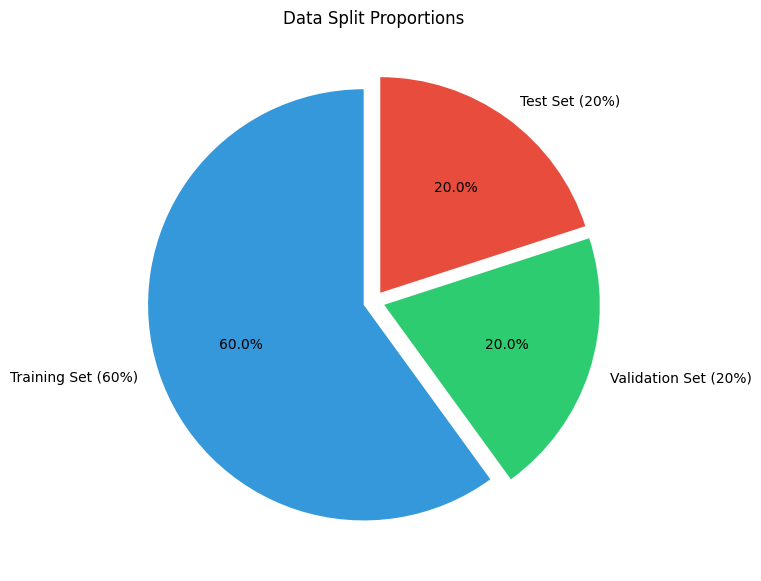

In [167]:

total_size = len(X)
test_size = len(X_test)
val_size = len(X_val)
train_size = len(X_train)

test_percent = test_size / total_size * 100
val_percent = val_size / total_size * 100
train_percent = train_size / total_size * 100

sizes = [train_percent, val_percent, test_percent]
labels = ['Training Set (60%)', 'Validation Set (20%)', 'Test Set (20%)']
colors = ['#3498db', '#2ecc71', '#e74c3c']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0.05, 0.05))
plt.title('Data Split Proportions')
plt.show()


In [168]:
print('x_train:',X_train.shape)
print('y_train:',y_train.shape)
print('x_test:',X_test.shape)
print('y_test:',y_test.shape)

x_train: (20775, 28, 28, 1)
y_train: (20775,)
x_test: (6926, 28, 28, 1)
y_test: (6926,)


##### **One-Hot Encoding Target Labels for Multi-Class Classification**
##### This code converts the target labels (y_train and y_val) into one-hot encoded vectors for use in a multi-class classification problem, where there are 25 unique classes.

In [169]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=25)
y_val_one_hot = to_categorical(y_val, num_classes=25)


##### **Building a Convolutional Neural Network (CNN) for Sign Language Classification**
##### This code snippet imports the necessary libraries from TensorFlow and Keras to construct a Convolutional Neural Network (CNN) designed for classifying hand signs in the Sign Language MNIST dataset.

##### **Model Definition:**
##### A Sequential model is instantiated, which allows layers to be stacked linearly.

##### **Convolutional Layers:**
##### The first layer (Conv2D) applies 32 filters of size 3x3, using ReLU activation, and accepts input images of shape (28, 28, 1) (grayscale).
##### The second convolutional layer uses 64 filters of size 3x3 with ReLU activation.
##### The third convolutional layer again uses 64 filters of size 3x3 with ReLU activation.

##### **Pooling Layers:**
##### MaxPooling2D layers are used after each convolutional layer to reduce spatial dimensions, helping to minimize computational load and prevent overfitting.

##### **Flattening:**
##### The output from the last convolutional layer is flattened into a 1D vector to prepare it for the fully connected layers.

##### **Dense Layers:**
##### A fully connected layer with 64 neurons and ReLU activation is added.
##### The output layer consists of 25 neurons with softmax activation, corresponding to the 25 classes representing the letters A to Z in American Sign Language (ASL).
##### This CNN architecture is suitable for image classification tasks, allowing the model to learn features from the input images to make accurate predictions.

In [170]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(25, activation='softmax')  # Assuming 25 sign classes
])


c:\Users\NTC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### **Compiling the CNN Model for Training**
##### This code snippet compiles the previously defined Convolutional Neural Network (CNN) model, preparing it for training on the Sign Language MNIST dataset.

##### **Optimizer:**
##### The Adam optimizer is used, which is an adaptive learning rate optimization algorithm that combines the advantages of two popular optimization techniques: AdaGrad and RMSProp. Adam is known for its efficiency and is particularly effective in handling sparse gradients.

##### **Loss Function:**
##### The loss function specified is categorical crossentropy, which is suitable for multi-class classification problems. This function measures the difference between the true labels and the predicted probabilities outputted by the softmax layer, guiding the model to improve its predictions during training.

##### **Metrics:**
##### The model will track accuracy as a performance metric during training and evaluation. Accuracy provides a straightforward measure of how many predictions made by the model are correct, which is critical for understanding model performance in classification tasks.**

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [171]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [172]:
early_stopping = EarlyStopping(
    monitor='val_loss',            
    patience=3,                    
    restore_best_weights=True,    
    verbose=1                      
)

##### **Training the CNN Model with Early Stopping**
##### This code snippet trains the Convolutional Neural Network (CNN) model on the Sign Language MNIST dataset using the training dataset (X_train, y_train) while monitoring its performance on the validation dataset (X_val, y_val).

In [173]:
history = model.fit(X_train, y_train_one_hot, epochs=15,batch_size=500, validation_data=(X_val, y_val_one_hot),  
    callbacks=[early_stopping]   # Include the early stopping callback
)

Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.0936 - loss: 3.1315 - val_accuracy: 0.2996 - val_loss: 2.4039
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.3473 - loss: 2.1681 - val_accuracy: 0.5052 - val_loss: 1.6004
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5489 - loss: 1.4819 - val_accuracy: 0.6591 - val_loss: 1.1469
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6742 - loss: 1.0527 - val_accuracy: 0.7258 - val_loss: 0.8905
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7517 - loss: 0.8091 - val_accuracy: 0.7984 - val_loss: 0.6521
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8084 - loss: 0.6112 - val_accuracy: 0.8353 - val_loss: 0.5161
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8555 - loss: 0.4648 - val_accuracy: 0.8699 - val_loss: 0.4147
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8916 - loss: 0.3657 - val_accuracy: 0.9098 - v

##### **Visualizing Model Performance: Accuracy and Loss Graphsv**
##### This code snippet generates two plots to visualize the performance of the Convolutional Neural Network (CNN) during training on the Sign Language MNIST dataset. The plots illustrate the model's accuracy and loss over the epochs, providing insights into its learning process.

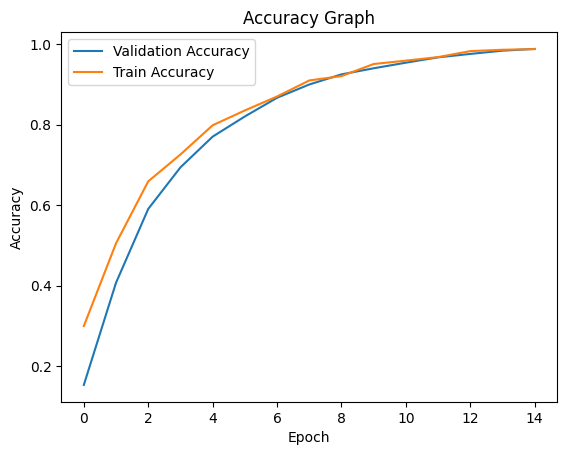

In [174]:
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Graph')
plt.show()


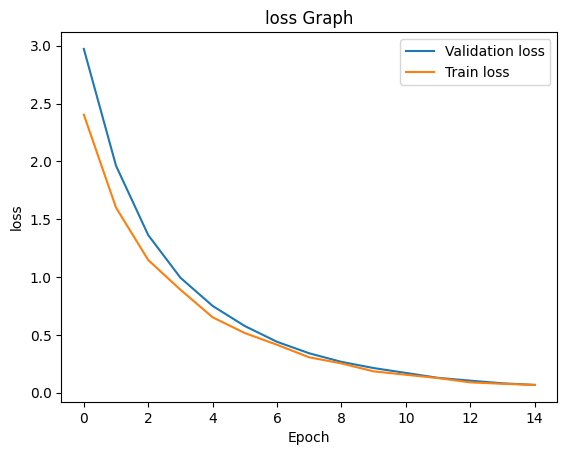

In [175]:
plt.plot(history.history['loss'], label='Validation loss')
plt.plot(history.history['val_loss'], label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.title('loss Graph')
plt.show()

##### **Visualizing Model Predictions vs. Actual Labels**
##### This code snippet visualizes the predictions made by the trained Convolutional Neural Network (CNN) model on the Sign Language MNIST dataset, comparing them to the actual labels. The output consists of a grid of images alongside their predicted and actual character labels.

217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


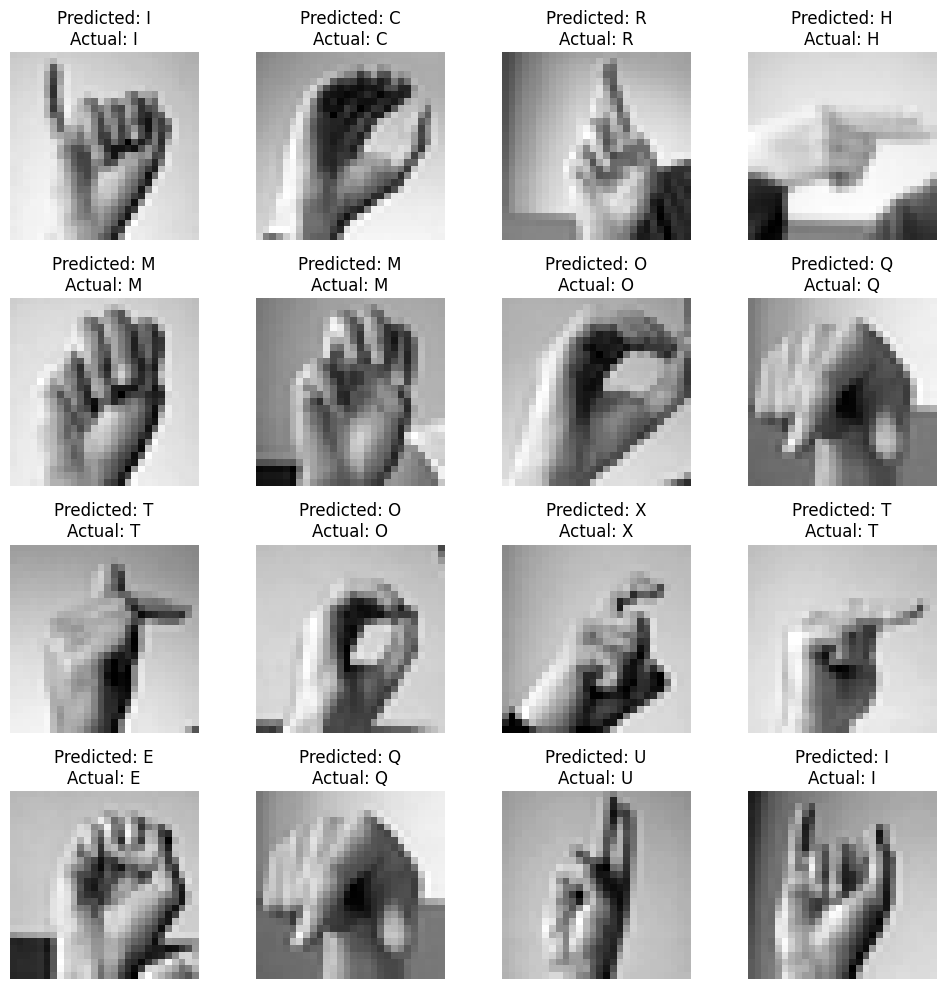

In [176]:

label_map = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H',
    8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
    15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V',
    22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}


predicted_labels = np.argmax(model.predict(X_test), axis=1)
predicted_chars = [label_map[label] for label in predicted_labels]

actual_chars = [label_map[label] for label in y_test]

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    
    plt.title(f'Predicted: {predicted_chars[i]}\nActual: {actual_chars[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


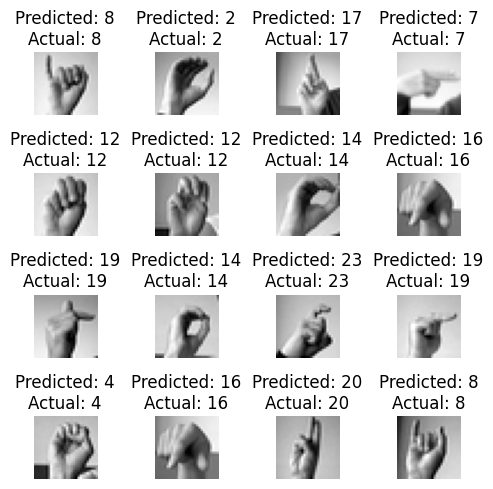

In [177]:
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# Plot some of the test images with their predicted and actual labels
plt.figure(figsize=(5, 5))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}\nActual: {y_test[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

##### **Image Prediction Using a Convolutional Neural Network for Sign Language Recognition**
##### This code snippet demonstrates how to preprocess a new image and use a trained convolutional neural network (CNN) model to predict the corresponding sign language character. The following steps are executed in this process:

##### **Image Loading and Preprocessing:**
##### The specified image is loaded using the OpenCV library (cv2). It is read in grayscale mode to facilitate processing.
##### The image is resized to 28x28 pixels, which matches the input size expected by the CNN model. This size is critical for consistent input dimensions across all images used for prediction.
##### The image undergoes normalization by scaling pixel values to the range of 0 to 1. This step is essential for ensuring that the model's performance is optimal, as it allows the neural network to learn more effectively during training.
##### An additional dimension is added to the image array to represent the channel and batch size, making it suitable for input into the CNN.

##### **Prediction:**
##### The preprocessed image is passed to the model for prediction. The predict method of the model returns an array of probabilities for each class (sign language letter).
##### The predicted label is obtained by identifying the index of the highest probability using np.argmax, which corresponds to the predicted character.

##### **Visualization:**
##### The preprocessed image is displayed using Matplotlib. The title of the plot includes the predicted label, providing immediate visual feedback about the classification result.
##### The axis labels are turned off for a cleaner visualization.

##### **Label Mapping:**
##### A dictionary, label_map, is defined to map the predicted label index to its corresponding sign language character (A-Z). This mapping allows for easy interpretation of the model's output.
##### The predicted character is printed to the console using the mapped label.

##### **Output:**
##### The predicted label index and the corresponding character are printed, providing a clear indication of the model's classification result.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


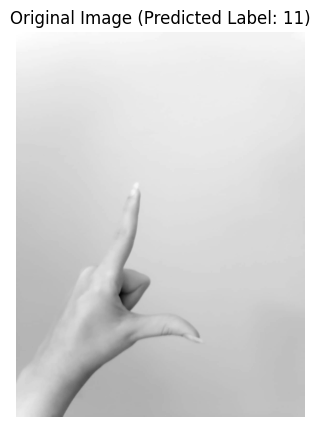

Predicted Label: 11
Predicted Character: L


In [178]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

new_image_path = "C:/Users/NTC/Desktop/deep learning/CNN/sing/WhatsApp Image 2024-10-09 at 15.37.52_ddba1638.jpg"


image_size = (28, 28)  
img = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)  

if img is None:
    raise ValueError("Image not found or unable to load.")


original_img = img.copy()


img = cv2.resize(img, image_size)  
img = np.expand_dims(img, axis=-1)  
img = np.expand_dims(img, axis=0) / 255.0 


prediction = model.predict(img)
predicted_label = np.argmax(prediction, axis=1)[0] 


plt.figure(figsize=(5, 5))  
plt.imshow(original_img, cmap='gray') 
plt.title(f'Original Image (Predicted Label: {predicted_label})')
plt.axis('off')  
plt.show()


print(f'Predicted Label: {predicted_label}')

label_map = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
}

print(f'Predicted Character: {label_map.get(predicted_label, "Unknown Label")}')


##### **Saving and Loading a Trained Keras Model**
##### This code demonstrates how to save a trained Keras model to a file and later load it for future use. This is useful for preserving the model after training, allowing it to be reused without needing to retrain it.

In [180]:
model.save('model.h5')

loaded_model =tf.keras.models.load_model('model.h5')